# 分词与词频统计（TF-IDF）

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
import jieba.analyse as analyse
from wordcloud import WordCloud,STOPWORDS
import jieba
import matplotlib.pyplot as plt
import re
from mysutils.text import remove_urls
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('chugui.xlsx')
sentence1=data.iloc[:,0].to_list()
str_sentence1=str(sentence1)

In [4]:
sentence_seged1=jieba.cut(str_sentence1) 

In [5]:
stopwords=[line.strip() for line in open('hit_stopwords.txt',encoding="UTF-8").readlines()]   
words1=''                                                                 
for word in sentence_seged1:                                               
    if word not in stopwords:
        if word!='\t': 
           words1+=word
           words1+=' '

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zj_ta\AppData\Local\Temp\jieba.cache
Loading model cost 1.008 seconds.
Prefix dict has been built successfully.


In [6]:
#提取关键字-TF-IDF
keywords1 = jieba.analyse.extract_tags(str(words1),
                    topK=150,
                    withWeight=True, 
                    allowPOS=())
word_weights1 = pd.DataFrame(keywords1)
word_weights1 

,0,1
0,出柜,1.754420
1,妈妈,0.082653
2,父母,0.071301
3,分享,0.037384
4,朋友,0.036257
...,...,...
145,姬圈,0.007413
146,微信,0.007413
147,知道,0.007393
148,家庭,0.007163


In [7]:
word_weights1.to_excel("word_weights1.xlsx")

In [8]:
#查询关键词权重
word_weights1[word_weights1[0].isin(['妈妈','爸爸','母亲','父亲','老爸','老妈','爸爸','父母','老师','朋友','室友','同学','哥哥','弟弟','姐姐','妹妹','儿子','女儿','闺女','gay','姬圈','橘气','男友','女友','男朋友','女朋友'])]

,0,1
1,妈妈,0.082653
2,父母,0.071301
4,朋友,0.036257
6,橘气,0.034594
12,女友,0.026928
13,弟弟,0.026866
21,儿子,0.024328
22,室友,0.024191
25,男友,0.022959
28,gay,0.022239


# 倾诉对象与倾诉主体

D:\coding\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


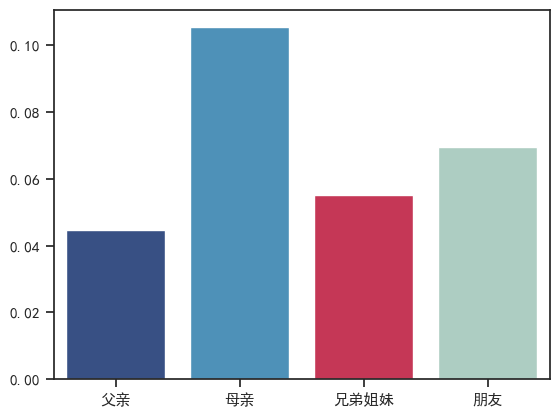

In [18]:
#根据关键词权重绘制分类条形统计——谁是倾诉对象？父亲or母亲or兄弟姐妹or朋友
#将“爸爸”“老爸”“父亲”的权重相加得到0.044621
#将“妈妈”“老妈”“母亲”的权重相加得到0.105385
#将“哥哥”“弟弟”“姐姐” “妹妹”的权重相加得到0.055067
#将“同学”“朋友”“室友”的权重相加得到0.069385

rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
x = ['父亲','母亲','兄弟姐妹','朋友']
y = [0.044621,0.105385,0.055067,0.069385]
palette =  ['#2b4c91', '#3c96ca', '#dd1f49','#a8d2c4']

sns.barplot(x, y, palette=palette)
# plt.savefig("倾诉对象.png")
plt.show()


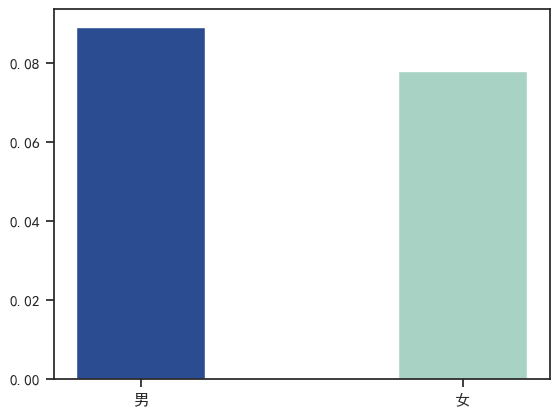

In [35]:
#根据关键词权重绘制分类条形统计——谁在倾诉？男or女
#将“儿子”“男友”“男朋友” “gay” 的权重相加得到0.089196
#将“女友”“女朋友”“姬圈” “橘气”的权重相加得到0.078076
x1 = ['男','女']
y1= [0.089196,0.078076]
colors = ['#2b4c91', '#a8d2c4']
plt.bar(x = x1, height = y1, color = colors, width = 0.4)
# plt.savefig("倾诉主体.png")
plt.show()

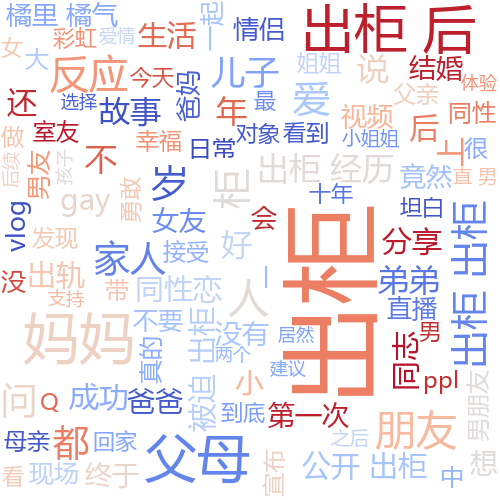

<Figure size 800x500 with 0 Axes>

In [52]:
#建立wordcloud对象，通过WordCloud库函数生成词云，直观展示结果

wc = WordCloud(font_path="C:/Windows/Fonts/msyh.ttc",#'HYQiHei-105.TTF'                     #wc没有中文字体库，需要导入一个
               width=500,
               height=500,
               max_words = 100,
               mode='RGBA',
               colormap='coolwarm',
               max_font_size = 100,
                contour_width = 3,
               background_color=None)
wc.generate(str(words1))                                      #通过我们的过滤后的分词结果生成词云

plt.figure(figsize=(8, 5))
wc.to_image()
# wc.to_file("comment_cloud1.png")


# LDA主题分析

In [11]:
import re
import jieba as jb
import pyLDAvis.gensim_models
import codecs
from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import gensim
from gensim import corpora, models
import matplotlib.pyplot as plt
import matplotlib
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

C:\Users\Dell\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [12]:

def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords
 
def seg_sentence(sentence):
    sentence = re.sub(u'[0-9\.]+', u'', sentence)
    jb.add_word('橘里橘气')
    sentence_seged = jb.cut(sentence.strip())
    stopwords = stopwordslist('hit_stopwords.txt')  # 这里加载停用词的路径
    outstr = ''
    for word in sentence_seged:
        if word not in stopwords and word.__len__()>1:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr
 
inputs=data['标题']
outputs = open('标题分词.txt', 'w',encoding='utf-8')
for line in inputs:
    line_seg = seg_sentence(line)  # 这里的返回值是字符串
    outputs.write(line_seg + '\n')
outputs.close()
 

<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
C:\Users\Dell\AppData\Local\Temp\ipykernel_204\4279848803.py:7: DeprecationWarning: invalid escape sequence \.
  sentence = re.sub(u'[0-9\.]+', u'', sentence)


In [43]:
train = []
fp = codecs.open('标题分词.txt','r',encoding='utf8')
for line in fp:
    if line != '':
        line = line.split()
        train.append([w for w in line])
dictionary = corpora.Dictionary(train) 
corpus = [dictionary.doc2bow(text) for text in train]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=100)
# num_topics：主题数目
# passes：训练伦次
# num_words：每个主题下输出的term的数目 
for topic in lda.print_topics(num_words = 20):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
        
d=pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
 
pyLDAvis.save_html(d, 'lda_pass1.html')

0:
  "出柜" (0.106)
  "父母" ( 0.013)
  "生活" ( 0.007)
  "朋友" ( 0.006)
  "橘里橘气" ( 0.006)
  "不要" ( 0.006)
  "结婚" ( 0.005)
  "公开" ( 0.005)
  "今天" ( 0.005)
  "爸妈" ( 0.004)
  "一起" ( 0.004)
  "两个" ( 0.004)
  "家人" ( 0.004)
  "现场" ( 0.004)
  "彩虹" ( 0.004)
  "情侣" ( 0.004)
  "反应" ( 0.003)
  "被迫" ( 0.003)
  "到底" ( 0.003)
  "没有"( 0.003)
1:
  "出柜" (0.102)
  "妈妈" ( 0.022)
  "分享" ( 0.012)
  "成功" ( 0.006)
  "故事" ( 0.006)
  "男友" ( 0.006)
  "十年" ( 0.005)
  "经验" ( 0.005)
  "同志" ( 0.005)
  "父亲" ( 0.005)
  "出轨" ( 0.005)
  "终于" ( 0.004)
  "生日" ( 0.004)
  "爸爸" ( 0.004)
  "性别" ( 0.003)
  "粉丝" ( 0.003)
  "准备" ( 0.003)
  "需要" ( 0.003)
  "喜欢" ( 0.003)
  "女生"( 0.003)
2:
  "出柜" (0.088)
  "妈妈" ( 0.012)
  "父母" ( 0.011)
  "朋友" ( 0.008)
  "反应" ( 0.008)
  "第一次" ( 0.006)
  "看到" ( 0.006)
  "视频" ( 0.005)
  "出轨" ( 0.005)
  "家人" ( 0.005)
  "故事" ( 0.005)
  "回家" ( 0.005)
  "问题" ( 0.005)
  "同事" ( 0.005)
  "vlog" ( 0.005)
  "经历" ( 0.004)
  "竟然" ( 0.003)
  "室友" ( 0.003)
  "过程" ( 0.003)
  "原来"( 0.003)
3:
  "出柜" (0.122)
  "父母" ( 0.010

C:\Users\Dell\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


[['朋友', '同性恋', '出柜', '深圳', '小岁', '男朋友'], ['出柜', '爸爸', '姬崽时'], ['通讯录', '一定', '出柜', '妈妈', '知道', '半年', '心酸', '出柜史', '公开', '柜门', '正确', '打开方式', '分享'], ['POV', '面对', '出柜', '不同', '表现'], ['儿子', '出柜', '一位', '同志', '母亲', '自述', '崩溃', '现在', '感觉', '男友', '小家庭', '过得', '幸福'], ['我妈', '看到', '分享', '出柜', '经历', '反应', '出乎', '意料'], ['出柜', '妈妈', 'cp'], ['被迫', '出柜', '终于', '女朋友', '爸妈', '聊到', '未来'], ['你长', '配当', 'gay', '普通人', '出柜', '经历'], ['下攻', '男朋友', '家人', '出柜', '竟然', '顺利', '真是', '紧张'], ['出柜', '回家', '侧面', '试探', '妈妈', '口风', '媳妇', '妈妈', '嫌弃'], ['没有', '准备', '盲目', '出柜', '致命', '出柜', '三年', '经验', '分享'], ['出柜', '顺利', '妈妈'], ['东北', '妈妈', '孩子', '出柜', '纪录', '短片'], ['对姬', '精准', '出柜', '直人', '深柜'], ['那年', '出柜'], ['夫夫', '十年', '相识', '相知', '相守', '出柜', '被迫', '分开', '父母', '终于', '理解', '一起'], ['聊聊', '出柜'], ['出柜', '出柜', '心得', '分享'], ['出柜', '爸爸', '痛哭', '对不起', '出柜', '经验', '分享'], ['出柜', '不到', '最后', '交友', '标准', '见过', '家长', '看不出', '欲望', '有过', '真正', '分手', '念头'], ['出柜'], ['相恋', '同居', '出柜', '如今', '依然', '一起'], ['鼓足勇气', '坦白', '出柜', '姐妹', '反应',

[(0, '0.102*"出柜" + 0.009*"妈妈" + 0.008*"父母" + 0.004*"朋友" + 0.004*"反应" + 0.004*"分享" + 0.004*"经历" + 0.003*"公开" + 0.003*"家人" + 0.003*"儿子" + 0.003*"同志" + 0.003*"被迫" + 0.003*"故事" + 0.003*"弟弟" + 0.003*"成功" + 0.002*"出轨" + 0.002*"生活" + 0.002*"视频" + 0.002*"同性恋" + 0.002*"爸爸"')]
-6.944622929584837
[(0, '0.066*"出柜" + 0.005*"第一次" + 0.005*"父母" + 0.005*"家人" + 0.005*"情侣" + 0.004*"男友" + 0.004*"视频" + 0.004*"女友" + 0.004*"故事" + 0.004*"性别" + 0.003*"结婚" + 0.003*"男朋友" + 0.003*"今天" + 0.003*"同性" + 0.003*"生活" + 0.003*"现场" + 0.003*"啊啊啊" + 0.003*"面前" + 0.002*"直播" + 0.002*"同性恋"'), (1, '0.126*"出柜" + 0.014*"妈妈" + 0.010*"父母" + 0.007*"朋友" + 0.006*"反应" + 0.006*"分享" + 0.006*"经历" + 0.006*"公开" + 0.005*"儿子" + 0.004*"弟弟" + 0.004*"成功" + 0.004*"被迫" + 0.004*"同志" + 0.004*"出轨" + 0.003*"没有" + 0.003*"爸爸" + 0.003*"一起" + 0.003*"不要" + 0.003*"哥哥" + 0.003*"爸妈"')]
-7.119438142332667
[(0, '0.043*"出柜" + 0.007*"视频" + 0.007*"看到" + 0.006*"弟弟" + 0.005*"啊啊啊" + 0.004*"希望" + 0.003*"勇敢" + 0.003*"家里" + 0.003*"电影" + 0.003*"呜米" + 0.003*"同意" + 0.003*"

[(0, '0.141*"出柜" + 0.012*"朋友" + 0.008*"父母" + 0.006*"没有" + 0.006*"发现" + 0.006*"妈妈" + 0.006*"出轨" + 0.005*"家人" + 0.005*"接受" + 0.005*"成功" + 0.005*"室友" + 0.005*"被迫" + 0.005*"建议" + 0.005*"今天" + 0.005*"男友" + 0.005*"or" + 0.005*"爱情" + 0.004*"vlog" + 0.004*"情侣" + 0.004*"同性"'), (1, '0.057*"出柜" + 0.009*"反应" + 0.007*"分享" + 0.007*"竟然" + 0.007*"男朋友" + 0.007*"占卜" + 0.006*"亲戚" + 0.006*"家人" + 0.006*"姬圈" + 0.004*"对象" + 0.004*"妈妈" + 0.004*"室友" + 0.004*"家庭" + 0.004*"面前" + 0.004*"同性恋" + 0.004*"彩虹" + 0.004*"不要" + 0.004*"出柜时" + 0.004*"回家" + 0.004*"结婚"'), (2, '0.109*"出柜" + 0.027*"父母" + 0.007*"经历" + 0.006*"被迫" + 0.006*"生活" + 0.006*"家人" + 0.006*"故事" + 0.006*"公开" + 0.006*"同性恋" + 0.006*"异性恋" + 0.005*"终于" + 0.005*"结婚" + 0.005*"朋友" + 0.005*"妈妈" + 0.005*"反应" + 0.004*"真的" + 0.004*"需要" + 0.004*"橘里橘气" + 0.004*"第一次" + 0.004*"一起"'), (3, '0.066*"出柜" + 0.013*"啊啊啊" + 0.010*"妈妈" + 0.008*"公开" + 0.007*"父母" + 0.006*"喜欢" + 0.006*"夫夫" + 0.005*"这件" + 0.005*"孩子" + 0.005*"没有" + 0.003*"哥哥" + 0.003*"生活" + 0.003*"该不该" + 0.003*"弟弟" + 0.

[(0, '0.094*"出柜" + 0.012*"家人" + 0.011*"父母" + 0.009*"被迫" + 0.009*"妈妈" + 0.008*"公开" + 0.007*"面前" + 0.007*"回家" + 0.007*"意外" + 0.007*"美国" + 0.005*"女友" + 0.005*"家长" + 0.005*"幸福" + 0.005*"知道" + 0.005*"同学" + 0.005*"尴尬" + 0.005*"搞笑" + 0.005*"全家" + 0.005*"cp" + 0.005*"不算"'), (1, '0.074*"出柜" + 0.013*"结婚" + 0.011*"公开" + 0.009*"现场" + 0.009*"妈妈" + 0.006*"弟弟" + 0.006*"告诉" + 0.006*"爱情" + 0.006*"大型" + 0.006*"建议" + 0.006*"生活" + 0.006*"同性恋" + 0.004*"方式" + 0.004*"我妈" + 0.004*"谋杀案" + 0.004*"姐妹" + 0.004*"真人秀" + 0.004*"富察" + 0.004*"皇后" + 0.004*"时出"'), (2, '0.112*"出柜" + 0.008*"成功" + 0.007*"不要" + 0.006*"被迫" + 0.005*"直播" + 0.005*"视频" + 0.005*"父母" + 0.005*"家里" + 0.003*"成员" + 0.003*"vlog" + 0.003*"脏脏" + 0.003*"父亲" + 0.003*"不是" + 0.003*"疯狂" + 0.003*"勇敢" + 0.003*"表白" + 0.003*"求婚" + 0.003*"龙媛" + 0.003*"治疗" + 0.003*"离婚"'), (3, '0.104*"出柜" + 0.014*"父母" + 0.012*"公开" + 0.010*"弟弟" + 0.008*"儿子" + 0.008*"男朋友" + 0.006*"没有" + 0.006*"小姐姐" + 0.006*"哥哥" + 0.006*"爆笑" + 0.006*"竟然" + 0.006*"反应" + 0.005*"gay" + 0.005*"同性恋" + 0.005

[(0, '0.116*"出柜" + 0.034*"父母" + 0.011*"接受" + 0.011*"出轨" + 0.009*"家人" + 0.009*"终于" + 0.009*"竟然" + 0.009*"对象" + 0.008*"妈妈" + 0.007*"同性" + 0.005*"回家" + 0.005*"情侣" + 0.005*"公开" + 0.005*"生活" + 0.005*"爸妈" + 0.005*"儿子" + 0.005*"or" + 0.004*"同志" + 0.004*"女友" + 0.004*"吵架"'), (1, '0.086*"出柜" + 0.010*"生活" + 0.007*"公开" + 0.007*"朋友" + 0.005*"分享" + 0.005*"刘亚仁" + 0.005*"喜欢" + 0.005*"父母" + 0.005*"一定" + 0.005*"橘里橘气" + 0.005*"女生" + 0.005*"老娘" + 0.005*"妈妈" + 0.005*"小黑" + 0.005*"毒液" + 0.005*"粉丝" + 0.005*"恋爱" + 0.005*"这件" + 0.005*"体验" + 0.005*"注意事项"'), (2, '0.093*"出柜" + 0.014*"分享" + 0.009*"反应" + 0.007*"美国" + 0.007*"看到" + 0.007*"父亲" + 0.007*"儿子" + 0.007*"面前" + 0.007*"经验" + 0.007*"经历" + 0.005*"成员" + 0.005*"妈妈" + 0.005*"现场" + 0.005*"治疗" + 0.005*"柜门" + 0.005*"一家" + 0.005*"父母" + 0.005*"中心" + 0.005*"全家" + 0.005*"被迫"'), (3, '0.093*"出柜" + 0.021*"反应" + 0.013*"没有" + 0.010*"一起" + 0.008*"视频" + 0.008*"世界" + 0.008*"同性恋" + 0.008*"小姐姐" + 0.008*"社死" + 0.008*"朋友" + 0.005*"妈妈" + 0.005*"十年" + 0.005*"虎狼" + 0.005*"终于" + 0.005*"

[(0, '0.071*"出柜" + 0.018*"明星" + 0.009*"龙媛" + 0.009*"LGBT" + 0.009*"当众" + 0.009*"一年" + 0.009*"纪录片" + 0.006*"出轨" + 0.005*"今天" + 0.005*"要素" + 0.005*"词读" + 0.005*"过多" + 0.005*"最后" + 0.005*"全程" + 0.005*"敢答" + 0.005*"分手" + 0.005*"交友" + 0.005*"不到" + 0.005*"家长" + 0.005*"真正"'), (1, '0.113*"出柜" + 0.018*"父母" + 0.013*"朋友" + 0.009*"结婚" + 0.007*"被迫" + 0.007*"占卜" + 0.007*"反应" + 0.007*"生活" + 0.005*"分享" + 0.005*"妈妈" + 0.005*"性别" + 0.005*"ppl" + 0.005*"勇敢" + 0.005*"情侣" + 0.005*"姐妹" + 0.005*"橘里橘气" + 0.005*"最好" + 0.005*"坦白" + 0.005*"养成" + 0.005*"俗女"'), (2, '0.127*"出柜" + 0.024*"妈妈" + 0.010*"被迫" + 0.006*"发现" + 0.006*"家人" + 0.006*"朋友" + 0.006*"直播" + 0.006*"一起" + 0.006*"孩子" + 0.006*"接受" + 0.004*"宣布" + 0.004*"忘记" + 0.004*"经历" + 0.004*"指南" + 0.004*"社交" + 0.004*"治疗" + 0.004*"分享" + 0.004*"德语" + 0.004*"决定" + 0.004*"回应"'), (3, '0.144*"出柜" + 0.021*"反应" + 0.019*"父母" + 0.013*"儿子" + 0.013*"父亲" + 0.011*"同志" + 0.010*"朋友" + 0.008*"看到" + 0.008*"家人" + 0.007*"经历" + 0.007*"真的" + 0.007*"兄弟" + 0.005*"母亲" + 0.005*"感觉" + 0.005*"之

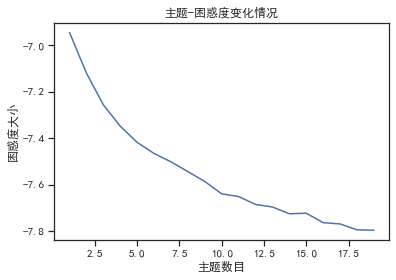

In [14]:
PATH = "标题分词.txt" 
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()  #读取每一行文本
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
print(data_set)  #输出所有分词列表
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
Lda = gensim.models.ldamodel.LdaModel  # 创建LDA对象
#计算困惑度
def perplexity(num_topics):
    ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)  #passes为迭代次数，次数越多越精准
    print(ldamodel.print_topics(num_topics=num_topics, num_words=20))  #num_words为每个主题下的词语数量
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
 
# 绘制困惑度折线图
x = range(1,20)  #主题范围数量
y = [perplexity(i) for i in x]
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('困惑度大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-困惑度变化情况')
plt.show()


Coherence Score:  0.5509281572198323

Coherence Score:  0.5323203439222576

Coherence Score:  0.5512468311821603

Coherence Score:  0.4938829679682144

Coherence Score:  0.5646560664407773

Coherence Score:  0.5388654029925359

Coherence Score:  0.577555283880226

Coherence Score:  0.5619942827776462

Coherence Score:  0.5733964699140865

Coherence Score:  0.5566471836763396

Coherence Score:  0.5709861342179294

Coherence Score:  0.5490787656628476

Coherence Score:  0.5421801417674135

Coherence Score:  0.5171997638695113

Coherence Score:  0.5352522417773964

Coherence Score:  0.5396623475447258

Coherence Score:  0.497732150934904

Coherence Score:  0.4906236110062257

Coherence Score:  0.4840906693094272


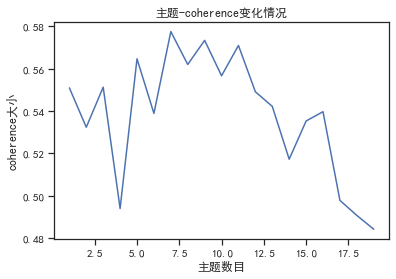

In [15]:
#计算一致性

def coherence(num_topics):
    ldamodel = Lda(corpus, num_topics=num_topics, id2word = dictionary, passes=50)  #passes为迭代次数，次数越多越精准
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_set, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score: ', coherence_lda)
    return coherence_lda
 
# 绘制一致性折线图
x = range(1,20)  #主题范围数量
y = [coherence(i) for i in x]
plt.plot(x,y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()